In [2]:
# Importing packages

import numpy as np # used for mathematical calculation 
import pandas as pd # Data manipulation and analysis
import matplotlib.pyplot as plt # for visualisation and creating graphs
from statsmodels.tsa.seasonal import seasonal_decompose # For time series forecasting (to break time series data into its seasonal, trend, and residual components)

In [1]:
# Reading the raw data

df = pd.read_csv('us visits.csv',
                       index_col ='day',
                       parse_dates = True)

NameError: name 'pd' is not defined

In [3]:
# checking the raw data

df

,Visits
day,
2019-04-01,10334
2019-04-02,11562
2019-04-03,10215
2019-04-04,10158
2019-04-05,9110
...,...
2022-04-26,11660
2022-04-27,10601
2022-04-28,10350


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1126 entries, 2019-04-01 to 2022-04-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Visits  1126 non-null   int64
dtypes: int64(1)
memory usage: 17.6 KB


In [21]:
df.shape

(1126, 1)

In [22]:
df.describe()

,Visits
count,1126.000000
mean,13182.533748
std,5039.221629
min,2689.000000
25%,10137.250000
50%,12304.000000
75%,14889.000000
max,49160.000000


In [23]:
df.size

1126

In [4]:
# Installing Arima package for creating forecasting model

pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [5]:
from pmdarima import auto_arima

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
# executeing linear regression forward and backward. 
# process that helps determine which factors are important and which are not
# lower the AIC, better the model

stepwise_fit = auto_arima(df['Visits'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True, 
                          stepwise = True)           

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=4.32 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=22589.700, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=22067.849, Time=0.52 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=21729.385, Time=3.44 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=22587.825, Time=0.05 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=22269.058, Time=0.19 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=21740.859, Time=3.11 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=21728.980, Time=7.30 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=10.89 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=22098.891, Time=3.55 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=10.15 sec
 ARIMA(0,0,2)(0,1,2)[12] intercept   : AIC=inf, Time=9.92 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=8.90 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=inf, Time=11.21 sec
 ARIMA(0,0,1)(0,1,2)[12]             :

In [8]:
# checking the summary

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 1126
Model:             SARIMAX(0, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood              -10859.490
Date:                                 Mon, 22 Aug 2022   AIC                          21728.980
Time:                                         20:02:50   BIC                          21754.058
Sample:                                              0   HQIC                         21738.461
                                                - 1126                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     45.5100     26.617      1.710      0.087      -6.658      97.678
ma.L1          0.5251      0.020     26.822      0.000       0.487       0.564
ma.S.L12      -0.8108      0.020    -40.601      0.000      -0.850      -0.772
ma.S.L24      -0.0602      0.023     -2.610      0.009      -0.105      -0.015
sigma2        1.7e+07      0.002   9.01e+09      0.000     1.7e+07     1.7e+07
===================================================================================
Ljung-Box (L1) (Q):                  17.24   Jarque-Bera (JB):              8457.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.45   Skew:                             2.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.7e+24. Standard errors may be unstable.
"""

In [9]:
# dividing dataset into test and train dataset.
# Train/Test is a method to measure the accuracy of your model. 
# It is called Train/Test because you split the the data set into two sets: a training set and a testing set.

train = df.iloc[:len(df)-800]
test = df.iloc[len(df)-326:]

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [11]:
model = SARIMAX(train['Visits'], 
                order = (0, 0, 1), 
                seasonal_order =(0, 1, 2, 12))

In [12]:
result = model.fit()

In [13]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                  Visits   No. Observations:                  563
Model:             SARIMAX(0, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -5349.619
Date:                                 Mon, 22 Aug 2022   AIC                          10707.238
Time:                                         20:02:52   BIC                          10724.485
Sample:                                     04-01-2019   HQIC                         10713.978
                                          - 10-14-2020                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5795      0.024     23.834      0.000       0.532       0.627
ma.S.L12      -0.6164      0.026    -23.888      0.000      -0.667      -0.566
ma.S.L24      -0.1702      0.029     -5.872      0.000      -0.227      -0.113
sigma2      1.568e+07   3.77e+05     41.629      0.000    1.49e+07    1.64e+07
===================================================================================
Ljung-Box (L1) (Q):                  12.45   Jarque-Bera (JB):              2809.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.56   Skew:                             1.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
start = len(train)
end = len(train) + len(test) - 1

In [15]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [16]:
# ARIMA MODEL
model = model = SARIMAX(df['Visits'], 
                        order = (0, 0, 1), 
                        seasonal_order =(0, 1, 2, 12))

In [17]:
result = model.fit()

In [25]:
forecast = result.predict(start = len(df), 
                          end = (len(df)-1) + 12 * 6, 
                          typ = 'levels').rename('Forecast')

<AxesSubplot:xlabel='day'>

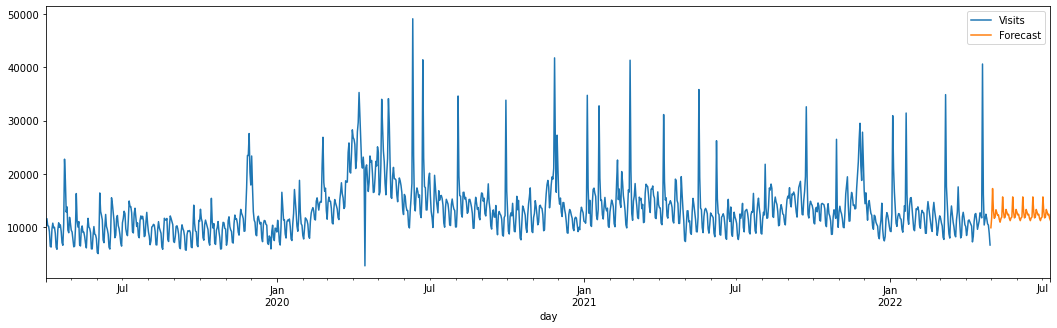

In [26]:
df['Visits'].plot(figsize = (18, 5), legend = True)
forecast.plot(legend = True)

In [27]:
forecast

2022-05-01     9856.451319
2022-05-02    11871.687896
2022-05-03    17229.269351
2022-05-04    13169.225699
2022-05-05    11628.532992
                  ...     
2022-07-07    12802.021101
2022-07-08    12257.497513
2022-07-09    12394.759766
2022-07-10    11598.632452
2022-07-11    11187.139742
Freq: D, Name: Forecast, Length: 72, dtype: float64